This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing


In [198]:
data=pd.read_csv('loan_train.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [199]:
data=pd.read_csv('loan_train.csv')

In [200]:
data.shape

(346, 10)

In [201]:
# convert to data time object
data['due_date']=pd.to_datetime(data['due_date'])
data['effective_date']=pd.to_datetime(data['effective_date'])
data.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [202]:
##Data visualization and pre-processing
data['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection

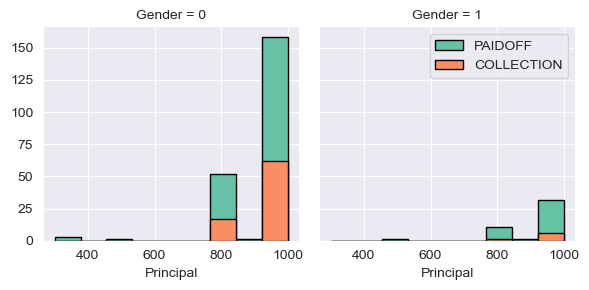

In [242]:
import seaborn as sns
bins= np.linspace(data.Principal.min(),data.Principal.max(),10)
x=sns.FacetGrid(data,col="Gender",hue="loan_status",palette="Set2", col_wrap=2)
x.map(plt.hist,'Principal', bins=bins ,ec="k")
x.axes[-1].legend()
plt.show()

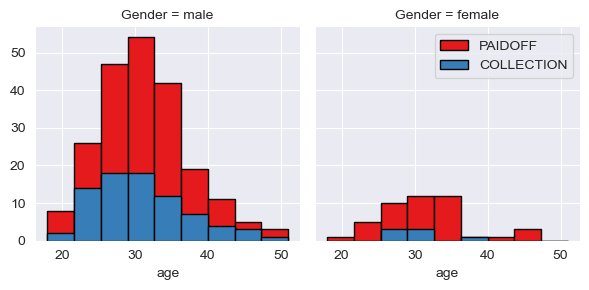

In [204]:
bins= np.linspace(data.age.min(),data.age.max(),10)
g=sns.FacetGrid(data,col="Gender",hue="loan_status",palette="Set1", col_wrap=2)
g.map(plt.hist,'age', bins=bins ,ec="k")
g.axes[-1].legend()
plt.show()

Pre-processing:Feature selection

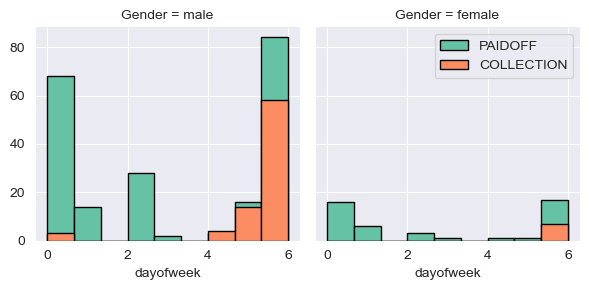

In [205]:
## look at the day of the week people get the loan
data['dayofweek']=data['effective_date'].dt.dayofweek
bins= np.linspace(data.dayofweek.min(),data.dayofweek.max(),10)
g=sns.FacetGrid(data,col="Gender",hue="loan_status",palette="Set2", col_wrap=2)
g.map(plt.hist,'dayofweek', bins=bins ,ec="k")
g.axes[-1].legend()
plt.show()

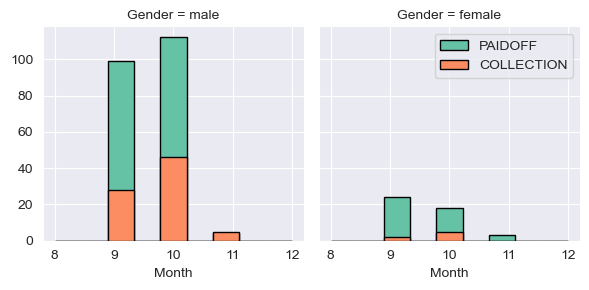

In [206]:
##look at the months people get the loan
data['Month']=data.due_date.dt.month
bins= np.linspace(data.Month.min()-1,data.Month.max()+1,10)
g=sns.FacetGrid(data,col="Gender",hue="loan_status",palette="Set2", col_wrap=2)
g.map(plt.hist,'Month', bins=bins ,ec="k")
g.axes[-1].legend()
plt.show()

the higher possibility that people pay off the loan in 9th month than paying it in 10th or 11th

In [207]:
## shows people who get the loan at the end of the week don't pay it off , use feature binarization to set threshold values less then day 4

data['weekend']=data['dayofweek'].apply(lambda x:1 if (x>3) else 0)
data.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,10,1


Convert Categorical features to numerical values

In [208]:
data.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

after convert gender we see 86% of the female pay there loans while only 73% of males pay there loans

In [209]:
## convert male to 0 and female to 1
data['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
data.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1


In [210]:
data['deadline']=data['due_date']-data['effective_date']
data.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,deadline
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,29 days
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,29 days
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,14 days
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1,29 days
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1,29 days


In [211]:
data['deadline']=data['deadline'].dt.days
data.head(3)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,deadline
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,29
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,29
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,14


results columns month and deadline doesn't improve the result so we will not use in feature sets of training

one hot encoding

In [212]:
 ## how about education
data.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

There are only two people with master or above degrees , one  of them has paid off the loan and the other one hasn't as a result keeping master or above in our data set wont't help much so we drop it

In [213]:
len(data[data.education=='Master or Above'])

2

we use one hot encoding tech to convert categorical variables to binary variables and append them to the feature Data frame

In [214]:
Feature = data[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature=pd.concat([Feature,pd.get_dummies(data['education'])],axis=1)
Feature.drop(['Master or Above'], axis=1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


Feature selection

In [215]:
X=Feature

In [216]:
# we encode  our  lables as 0 and 1
y = data['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1]).values


In [217]:
X=preprocessing.StandardScaler().fit_transform(X)


In [218]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [219]:
# our data for training (used '_train')
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [220]:
# keep all scores of the classifiers
Scores={}

K Nearest Neighbor (KNN)

In [221]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=5, leaf_size=10, weights='uniform', p=2)

In [222]:
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

C:\Users\moahm\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


 GridSearchCV

In [223]:
from sklearn.model_selection import  GridSearchCV
param_grid = [{
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'p': [1, 2],
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}]
log = GridSearchCV(knn, param_grid, cv=5)
log.fit(X_train, y_train)
log.best_params_

C:\Users\moahm\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\moahm\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'algorithm': 'brute',
 'leaf_size': 10,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [224]:
Scores ['KNN-Jaccard']=jaccard_score(y_test,y_pred)
Scores['KNN-f1-score']=f1_score(y_test, y_pred,average='weighted')

In [225]:
Scores

{'KNN-Jaccard': 0.15, 'KNN-f1-score': 0.735934596804162}

In [226]:
# plt.plot(range(3,12),list)
# plt.xlabel('K')
# plt.ylabel('CV Accuracy')
# plt.show()

Decision Tree

In [227]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree=clf_tree.fit(X_train,y_train)

In [229]:
Scores['Tree-jaccard']=jaccard_score(y_test,y_pred)
Scores['Tree-f1-score']=f1_score(y_test,y_pred, average="weighted")

In [230]:
Scores

{'KNN-Jaccard': 0.15,
 'KNN-f1-score': 0.735934596804162,
 'Tree-jaccard': 0.15,
 'Tree-f1-score': 0.735934596804162}

Support Vector Machine

In [231]:
y_train=y_train.astype(float)

In [232]:
from sklearn import svm
clf_svm = svm.SVC(random_state=7)
clf_svm.fit(X_train,y_train)

y_pred = clf_svm.predict(X_test)

In [235]:
Scores['SVM-jaccard']=jaccard_score(y_test,y_pred)
Scores['SVM-f1-score']=f1_score(y_test,y_pred,average='weighted')

In [236]:
Scores

{'KNN-Jaccard': 0.15,
 'KNN-f1-score': 0.735934596804162,
 'Tree-jaccard': 0.15,
 'Tree-f1-score': 0.735934596804162,
 'SVM-jaccard': 0.08333333333333333,
 'SVM-f1-score': 0.6763832658569502}

logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_log =LogisticRegression(random_state=0 ,solver = 'lbfgs',multi_class = 'multinomial')
clf_log.fit(X_train,y_train)
y_pred=clf_log.predict(X_test)


In [ ]:
Scores['LogReg-jaccard']=jaccard_score(y_test, y_pred)
Scores['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')


In [ ]:

Scores

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=100,max_features='sqrt',criterion='gini',random_state=43)
ran.fit(X_train, y_train)
ran_pred = ran.predict(X_test)
f1_score(y_test,ran_pred)

 GridSearchCV

In [ ]:
param_grid = [{
    'n_estimators': [25, 50, 100, 150, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None]
}]
log = GridSearchCV(ran, param_grid, cv=3)
log.fit(X_train, y_train)
log.best_params_

GradientBoostingClassifier

In [238]:
from sklearn.ensemble import GradientBoostingClassifier
from  sklearn.ensemble import AdaBoostClassifier
GBC = GradientBoostingClassifier(random_state=43)
GBC.fit(X_train, y_train)
GBC_Pred = GBC.predict(X_test)
f1_score(y_test, GBC_Pred)

0.2580645161290323

 AdaBoostClassifier

In [239]:
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
ABC_Pred = ABC.predict(X_test)
f1_score(y_test, ABC_Pred)

0.15384615384615383

 GaussianNB

In [241]:
from sklearn.naive_bayes import GaussianNB
GN = GaussianNB()
GN.fit(X_train, y_train)
predict = GN.predict(X_test)
f1_score(y_test, predict)

0.4166666666666667